In [1]:
import BondGraphTools as bgt
import math

In [2]:
model=bgt.new(name='straight tube')

In [3]:
p=0.60015*1e-6    #(m6/J)

In [4]:
E1=bgt.new("Se",value=11.997*1e6)     #(J/m6)
E2=bgt.new("Se",value=10.664*1e6)      #(J/m6)

C2=bgt.new("C", value=p)               #(m6/J)
# C2._constitutive_relations=['C*exp(q_0)-e_0', 'dq_0 - f_0']

# The amounts of the resistances are assumed to be equal in a straight tube
R1=bgt.new("R", value=10.664*1e-6)      #(J.s/m6)
R3=bgt.new("R", value=10.664*1e-6)      #(J.s/m6)

# The amounts of the inductors are assumed to be equal in a straight tube
L1=bgt.new("I", value=0.06665*1e6)     #(J.s2/m6)
L3=bgt.new("I", value=0.06665*1e6)     #(J.s2/m6)

In [5]:
zero_junc=bgt.new("0")
one_junc1=bgt.new("1")
one_junc2=bgt.new("1")

In [6]:
bgt.add(model,E1,E2,C2,R1,R3,L1,L3,zero_junc,one_junc1,one_junc2)

In [7]:
bgt.connect(E1,one_junc1)
bgt.connect(one_junc1,R1)
bgt.connect(one_junc1,L1)
bgt.connect(one_junc1,zero_junc)
bgt.connect(zero_junc,one_junc2)
bgt.connect(zero_junc,C2)
bgt.connect(one_junc2,R3)
bgt.connect(one_junc2,L3)
bgt.connect(E2,one_junc2)

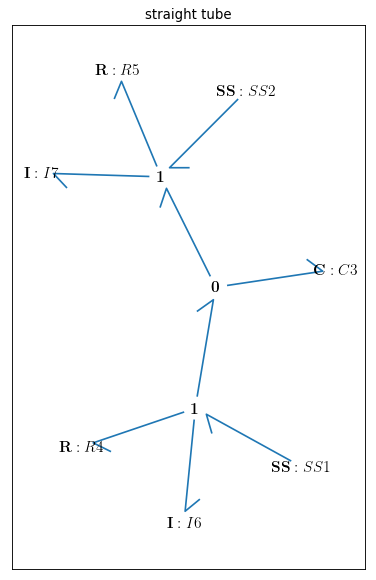

In [30]:
bgt.draw(model)

In [9]:
timespan=[0,20]

In [10]:
model.state_vars

{'x_0': (C: C3, 'q_0'), 'x_1': (I: I6, 'p_0'), 'x_2': (I: I7, 'p_0')}

In [11]:
x0={"x_0":5*1e-6, "x_1":0, "x_2":0}

In [12]:
model.constitutive_relations

[dx_0 - 2344336084021*x_1/156250000000000000 + 2344336084021*x_2/156250000000000000,
 dx_1 + 166625010414063*x_0/100000000 + x_1/6250000000 - 11997000,
 dx_2 - 166625010414063*x_0/100000000 + x_2/6250000000 - 10664000]

In [13]:
t, x = bgt.simulate(model, timespan=timespan, x0=x0)
# t, x = bgt.simulate(model, timespan=timespan, x0=x0, control_vars={'u_0':1, 'u_1':0})

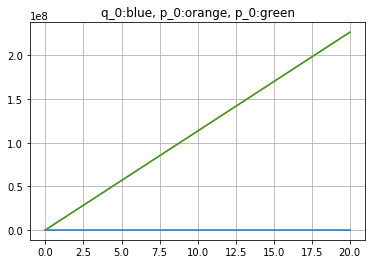

In [14]:
import matplotlib.pyplot as plt
fig=plt.plot(t,x)
plt.title("q_0:blue, p_0:orange, p_0:green")
plt.grid()

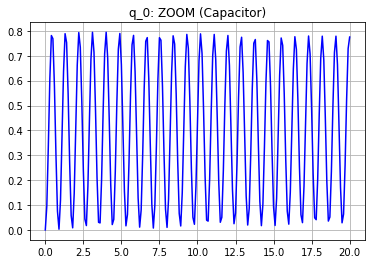

In [28]:
fig=plt.plot(t,x[:,0],'b')
plt.title("q_0: ZOOM (Capacitor)")
plt.grid()

In [16]:
#  dq_2/dt = v2 (current)

import numpy as np
f = np.array(x[:,0], dtype=float)
slope=np.gradient(f,0.1)
v2=slope

# fig=plt.plot(t,f)
# plt.title("v2")
# plt.grid()


In [17]:
# v1 current is the second colum in x matrix
v1=x[:,1]
# fig=plt.plot(t,v1)
# plt.title("v1")
# plt.grid()

In [18]:
# v3 current is the third colum in x matrix
v3=x[:,2]
# fig=plt.plot(t,v3)
# plt.title("v3")
# plt.grid()

In [19]:
# u4=(x[:,1])*R1._params['r']
# fig=plt.plot(t,u4)
# plt.title("u4")
# plt.grid()

In [20]:
f = np.array(x[:,1], dtype=float)
slope=np.gradient(f,0.1)
dv1=slope
u5=L1._params['L']*dv1
# fig=plt.plot(t,u5)
# plt.title("u5")
# plt.grid()


In [34]:

u2=p*np.exp(x[:,0])
# fig=plt.plot(t,u2)
# plt.title("u2")
# plt.grid()


In [22]:
f = np.array(x[:,2], dtype=float)
slope=np.gradient(f,0.1)
dv3=slope
u7=L3._params['L']*dv3

# fig=plt.plot(t,u7)
# plt.title("u7")
# plt.grid()

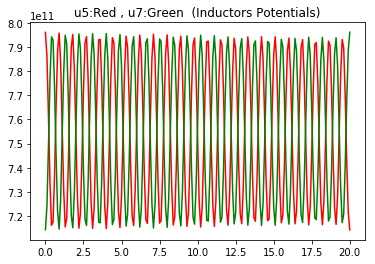

In [31]:
for u, c in [(u5,'r'), (u7,'g')]:
    fig=plt.plot(t,u,c)
    plt.title("u5:Red , u7:Green  (Inductors Potentials)")
    plt.grid()


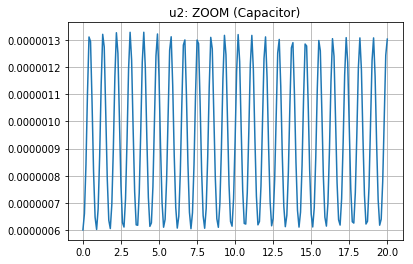

In [35]:
fig=plt.plot(t,u2)
plt.title("u2: ZOOM (Capacitor)")
plt.grid()

In [26]:
#print(E1.__dict__)
#print('\n')
#print(E1._params['C'])

In [27]:
# C2.__dict__